In [1]:
%pip uninstall ezpackage -y
%pip install git+https://github.com/ezg/ezpackage.git --upgrade

Found existing installation: ezpackage 0.1.0
Uninstalling ezpackage-0.1.0:
  Successfully uninstalled ezpackage-0.1.0
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/ezg/ezpackage.git to /private/var/folders/r7/qgrdncks1gxb930m8zd002mh0000gn/T/pip-req-build-flqu82ze
  Running command git clone --filter=blob:none --quiet https://github.com/ezg/ezpackage.git /private/var/folders/r7/qgrdncks1gxb930m8zd002mh0000gn/T/pip-req-build-flqu82ze
  Resolved https://github.com/ezg/ezpackage.git to commit 62674bb3eacc3b25776db050d6c767b7f1aedcc0
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for ezpackage, since package 'wheel' is not installed.
  Running setup.py install for ezpackage ... done

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import ezpackage
import pandas as pd

df = pd.read_csv("tracks.csv")
df = df[df["EVENT"] != "error"]

g1 = set(df[(df['USER_AGENT_BROWSER_OS'] == 'iOS') | (
    df['USER_AGENT_BROWSER_OS'] == 'Android OS')]['USER_ID'])
g2 = set(df['USER_ID']) - g1

user_col = 'USER_ID'
event_col = 'EVENT'

groups = ezpackage.funnel.funnel(data=df, targets=[
    'account_created', 'operator_created'], event_col=event_col, index_col=user_col, groups=(g1, g2),
    group_names=('mobile', 'non-mobile'))

fig = ezpackage.funnel.plot(groups)

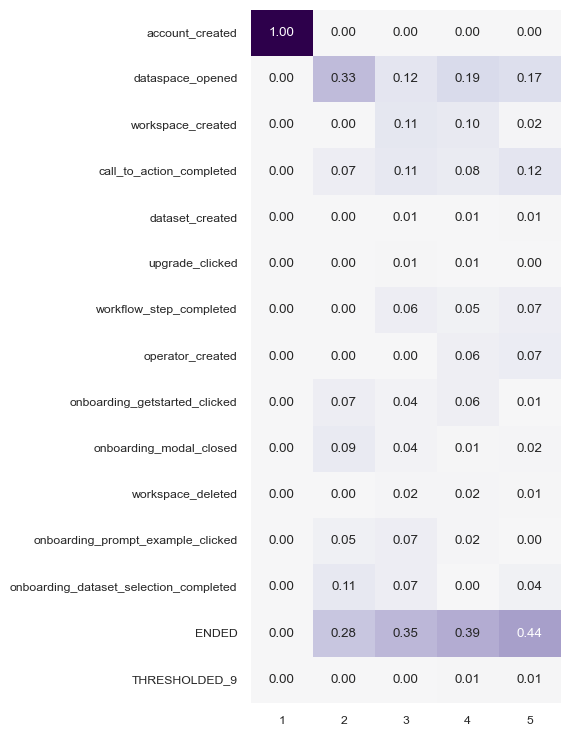

In [3]:

df.sort_values(by='TIMESTAMP')
g1 = set(df[(df['USER_AGENT_BROWSER_OS'] == 'iOS') | (
    df['USER_AGENT_BROWSER_OS'] == 'Android OS')]['USER_ID'])
g2 = set(df['USER_ID']) - g1


user_col = 'USER_ID'
event_col = 'EVENT'
time_col = 'TIMESTAMP'

groups = ezpackage.matrix.matrix(
    df, max_steps=5, event_col=event_col, index_col=user_col, time_col=time_col, thresh=0.01)
